# Big Mart Sales Prediction

In [48]:
# Import libraries
import os
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [49]:
# Set working directory 
os.chdir("C:\\Users\\rahul\\Documents\\Internship\\Technocolabs\\Project\\Data")

In [50]:
# Load Data 
train_data = pd.read_csv("C:\\Users\\rahul\\Documents\\Internship\\Technocolabs\\Project\\Data\Train.csv")
test_data = pd.read_csv("C:\\Users\\rahul\\Documents\\Internship\\Technocolabs\\Project\\Data\Test.csv")

In [51]:
train_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [9]:
train_data.shape

(8523, 12)

In [10]:
train_data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [11]:
test_data.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [12]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [13]:
train_data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


### Item_Weight is numerical column so we fill it with Mean Imputation

In [14]:
train_data['Item_Weight'].describe()

count    7060.000000
mean       12.857645
std         4.643456
min         4.555000
25%         8.773750
50%        12.600000
75%        16.850000
max        21.350000
Name: Item_Weight, dtype: float64

In [16]:
train_data['Item_Weight'].fillna(train_data['Item_Weight'].mean(),inplace=True)
test_data['Item_Weight'].fillna(test_data['Item_Weight'].mean(),inplace=True)

In [17]:
train_data.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [18]:
train_data['Item_Weight'].describe()

count    8523.000000
mean       12.857645
std         4.226124
min         4.555000
25%         9.310000
50%        12.857645
75%        16.000000
max        21.350000
Name: Item_Weight, dtype: float64

### Outlet_Size is catagorical column so we fill it with Mode Imputation

In [19]:
train_data['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [20]:
train_data['Outlet_Size'].mode()

0    Medium
Name: Outlet_Size, dtype: object

In [22]:
train_data['Outlet_Size'].fillna(train_data['Outlet_Size'].mode()[0],inplace=True)
test_data['Outlet_Size'].fillna(test_data['Outlet_Size'].mode()[0],inplace=True)

In [23]:
train_data.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [24]:
test_data.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

# Selecting features based on general requirements

In [25]:
train_data.drop(['Item_Identifier' ,'Outlet_Identifier'],axis = 1 ,inplace = True)
test_data.drop(['Item_Identifier' ,'Outlet_Identifier'],axis = 1 ,inplace = True)

In [26]:
train_data

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.300,Low Fat,0.016047,Dairy,249.8092,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.920,Regular,0.019278,Soft Drinks,48.2692,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,17.500,Low Fat,0.016760,Meat,141.6180,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,1998,Medium,Tier 3,Grocery Store,732.3800
4,8.930,Low Fat,0.000000,Household,53.8614,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...
8518,6.865,Low Fat,0.056783,Snack Foods,214.5218,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,8.380,Regular,0.046982,Baking Goods,108.1570,2002,Medium,Tier 2,Supermarket Type1,549.2850
8520,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,7.210,Regular,0.145221,Snack Foods,103.1332,2009,Medium,Tier 3,Supermarket Type2,1845.5976


# EDA using Pandas Profiling

In [29]:
from pandas_profiling import ProfileReport

In [33]:
profile = ProfileReport(train_data, title="Pandas Profiling Report")

In [34]:
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

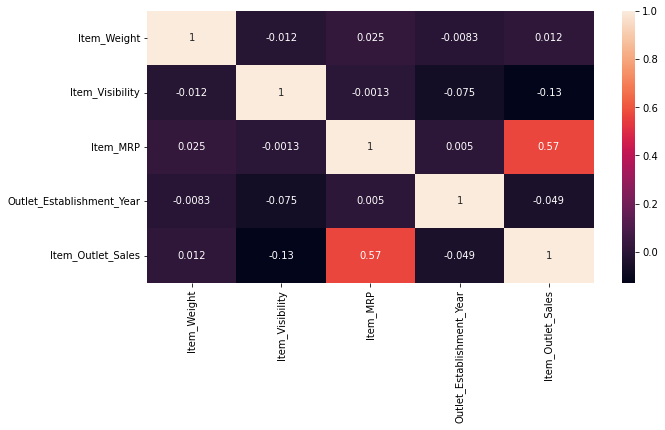

In [32]:
plt.figure(figsize=(10,5))
sns.heatmap(train_data.corr(),annot=True)
plt.show()

# EDA using Klib Library

In [39]:
import klib

GridSpec(6, 5)

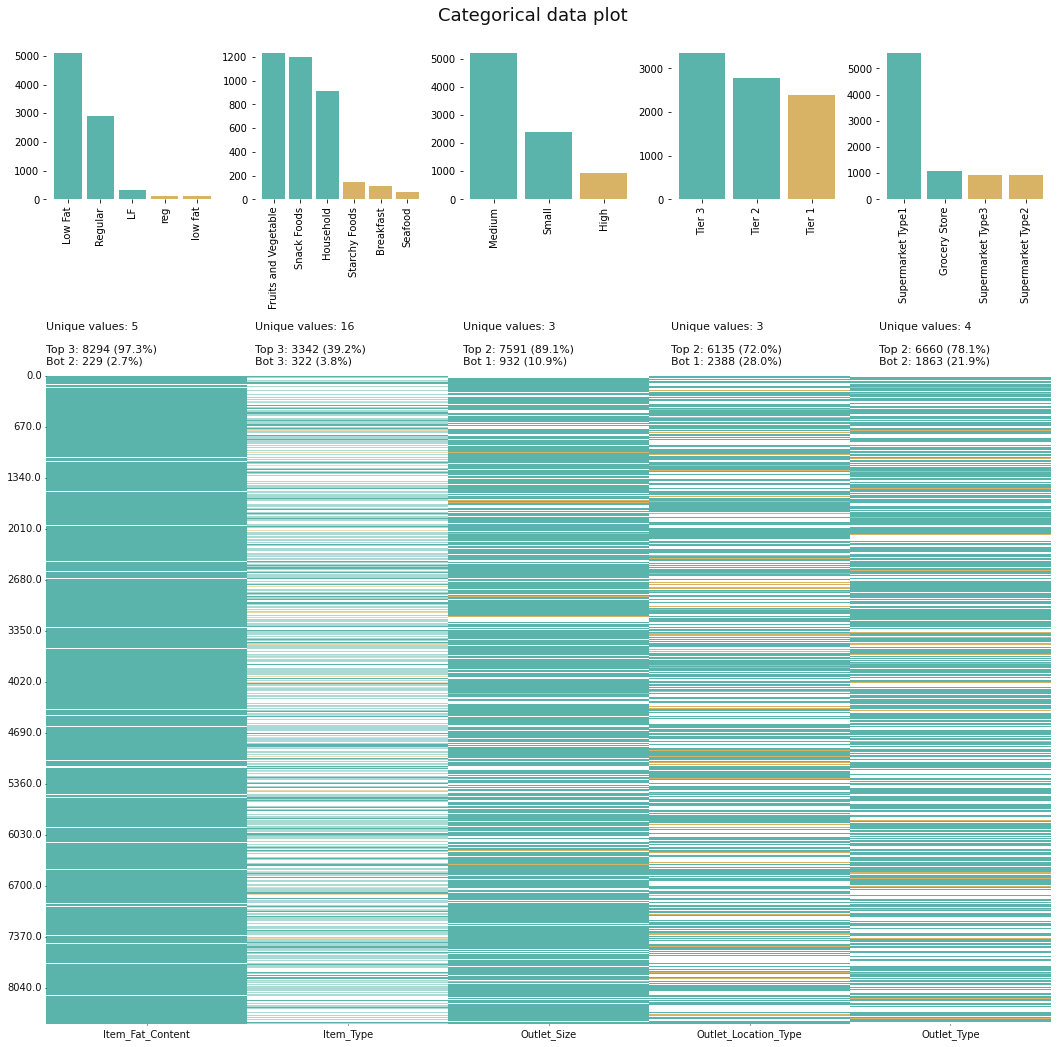

In [40]:
klib.cat_plot(train_data) 

<AxesSubplot: xlabel='Item_Outlet_Sales', ylabel='Density'>

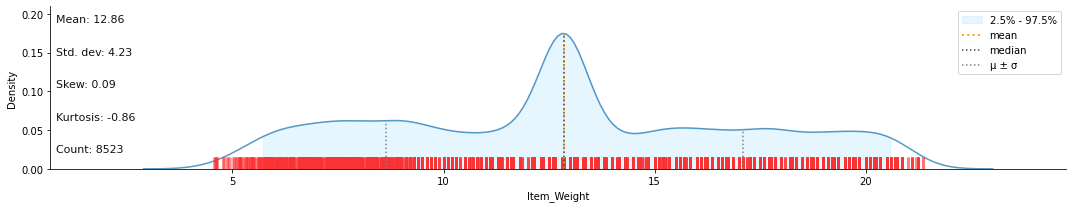

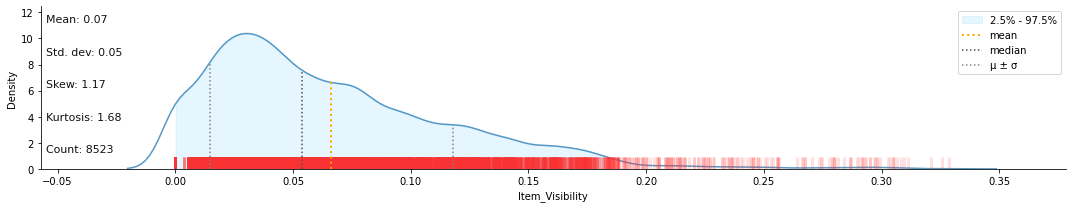

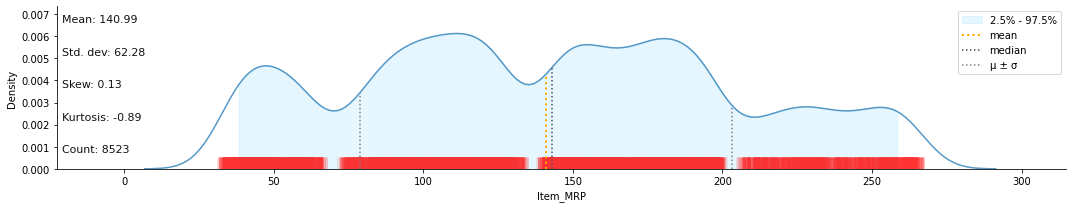

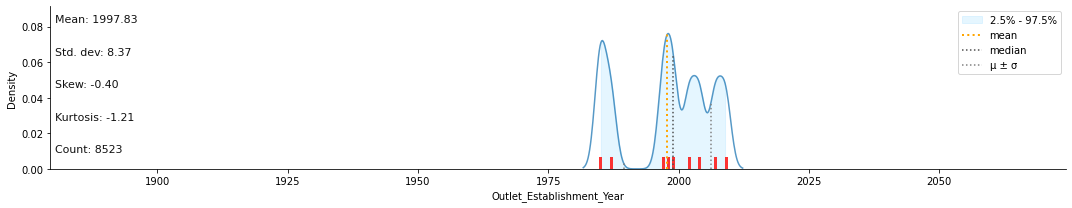

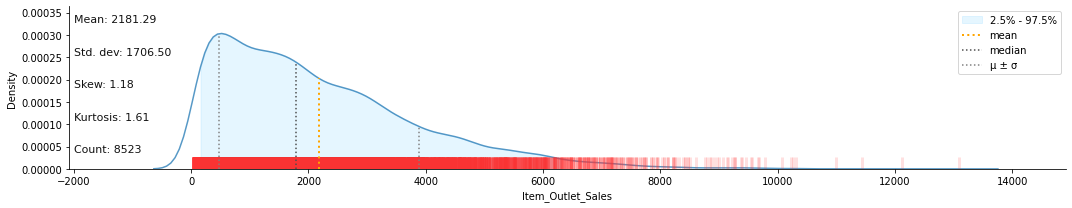

In [44]:
klib.dist_plot(train_data) 

In [45]:
klib.missingval_plot(train_data) 

No missing values found in the dataset.


## Label Encoding

In [51]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [52]:
train_data['Item_Fat_Content']= le.fit_transform(train_data['Item_Fat_Content'])
train_data['Item_Type']= le.fit_transform(train_data['Item_Type'])
train_data['Outlet_Size']= le.fit_transform(train_data['Outlet_Size'])
train_data['Outlet_Location_Type']= le.fit_transform(train_data['Outlet_Location_Type'])
train_data['Outlet_Type']= le.fit_transform(train_data['Outlet_Type'])

In [53]:
train_data

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.300,1,0.016047,4,249.8092,1999,1,0,1,3735.1380
1,5.920,2,0.019278,14,48.2692,2009,1,2,2,443.4228
2,17.500,1,0.016760,10,141.6180,1999,1,0,1,2097.2700
3,19.200,2,0.000000,6,182.0950,1998,1,2,0,732.3800
4,8.930,1,0.000000,9,53.8614,1987,0,2,1,994.7052
...,...,...,...,...,...,...,...,...,...,...
8518,6.865,1,0.056783,13,214.5218,1987,0,2,1,2778.3834
8519,8.380,2,0.046982,0,108.1570,2002,1,1,1,549.2850
8520,10.600,1,0.035186,8,85.1224,2004,2,1,1,1193.1136
8521,7.210,2,0.145221,13,103.1332,2009,1,2,2,1845.5976


#  Splitting our data into train and test

In [54]:
X = train_data.drop('Item_Outlet_Sales' ,axis = 1)

In [55]:
Y = train_data['Item_Outlet_Sales']

In [52]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X ,Y , random_state = 101 ,test_size = 0.3)

#  Standarization 

In [53]:
X.describe()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,1.369354,0.066132,7.226681,140.992782,1997.831867,1.170832,1.112871,1.201220
std,4.226124,0.644810,0.051598,4.209990,62.275067,8.371760,0.600327,0.812757,0.796459
min,4.555000,0.000000,0.000000,0.000000,31.290000,1985.000000,0.000000,0.000000,0.000000
25%,9.310000,1.000000,0.026989,4.000000,93.826500,1987.000000,1.000000,0.000000,1.000000
50%,12.857645,1.000000,0.053931,6.000000,143.012800,1999.000000,1.000000,1.000000,1.000000
75%,16.000000,2.000000,0.094585,10.000000,185.643700,2004.000000,2.000000,2.000000,1.000000
max,21.350000,4.000000,0.328391,15.000000,266.888400,2009.000000,2.000000,2.000000,3.000000


In [54]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [55]:
X_train_std = sc.fit_transform(X_train)

In [56]:
X_test_std = sc.transform(X_test)

In [57]:
X_train_std

array([[ 0.53896362,  0.97616142, -0.00297399, ..., -1.94898032,
         1.0889148 , -0.25773054],
       [ 1.09641933,  2.52052074, -0.269162  , ...,  1.38033009,
        -0.13614002, -0.25773054],
       [ 0.38477374,  0.97616142,  0.78994259, ..., -0.28432512,
         1.0889148 , -1.50986443],
       ...,
       [-0.08965666, -0.56819791, -0.92230552, ...,  1.38033009,
        -1.36119484, -0.25773054],
       [-0.75504529,  0.97616142,  1.22000704, ..., -0.28432512,
        -0.13614002, -0.25773054],
       [ 0.66943198, -0.56819791,  1.84832203, ..., -0.28432512,
         1.0889148 ,  0.99440334]])

In [58]:
X_test_std

array([[-0.44547946, -0.56819791, -0.21609764, ..., -0.28432512,
         1.0889148 ,  0.99440334],
       [ 1.21502693, -0.56819791, -0.53083829, ..., -1.94898032,
         1.0889148 , -0.25773054],
       [-1.22354531,  0.97616142,  0.1644594 , ...,  1.38033009,
        -1.36119484, -0.25773054],
       ...,
       [ 0.06453322, -0.56819791, -0.88371766, ..., -0.28432512,
        -0.13614002, -0.25773054],
       [ 0.50338134,  0.97616142,  1.85061574, ...,  1.38033009,
        -1.36119484, -0.25773054],
       [-1.4856681 ,  0.97616142,  0.5070239 , ..., -0.28432512,
         1.0889148 ,  0.99440334]])

In [59]:
Y_train

1037    3661.9000
7886    1857.5820
1875    1046.6376
3524    2388.8904
1398    5191.2426
          ...    
599     5502.8370
5695    1436.7964
8006    2167.8448
1361    2700.4848
1547     829.5868
Name: Item_Outlet_Sales, Length: 5966, dtype: float64

In [60]:
Y_test

8179     904.8222
8355    2795.6942
3411    1947.4650
7089     872.8638
6954    2450.1440
          ...    
2135     366.1900
3122    3361.6242
5822    1860.2452
6402    2766.3990
2881    4506.1344
Name: Item_Outlet_Sales, Length: 2557, dtype: float64

In [61]:
import joblib

In [62]:
joblib.dump(sc,"C:\\Users\\rahul\\Documents\\Internship\\Technocolabs\\Project\\Model\sc.sav")

['C:\\Users\\rahul\\Documents\\Internship\\Technocolabs\\Project\\Model\\sc.sav']

# Model Building

Linear Regression

In [63]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [64]:
lr.fit(X_train_std,Y_train)

LinearRegression()

In [65]:
X_test.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
8179,11.00,1,0.055163,8,100.3358,2009,1,2,2
8355,18.00,1,0.038979,13,148.6418,1987,0,2,1
3411,7.72,2,0.074731,1,77.5986,1997,2,0,1
7089,20.70,1,0.049035,6,39.9506,2007,1,1,1
6954,7.55,1,0.027225,3,152.9340,2002,1,1,1


In [66]:
Y_pred_lr = lr.predict(X_test_std)

In [67]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [68]:
print(r2_score(Y_test,Y_pred_lr))
print(mean_absolute_error(Y_test,Y_pred_lr))
print(np.sqrt(mean_squared_error(Y_test,Y_pred_lr)))


0.517717147228028
861.6861531939257
1138.2916026269556


In [69]:
joblib.dump(lr,"C:\\Users\\rahul\\Documents\\Internship\\Technocolabs\\Project\\Model\lr.sav")

['C:\\Users\\rahul\\Documents\\Internship\\Technocolabs\\Project\\Model\\lr.sav']

Random Forest Regression 

In [70]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=1000)

In [71]:
rf.fit(X_train_std,Y_train)

RandomForestRegressor(n_estimators=1000)

In [72]:
Y_pred_rf = rf.predict(X_test_std)

In [73]:
print(r2_score(Y_test,Y_pred_rf))
print(mean_absolute_error(Y_test,Y_pred_rf))
print(np.sqrt(mean_squared_error(Y_test,Y_pred_rf)))


0.5617164453664543
764.6750456132185
1085.1260989394345


# Hyper Parameter Tuning

In [76]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

# define models and parameters
model = RandomForestRegressor()
n_estimators = [10, 100, 1000]
max_depth = range(1,31)
min_samples_leaf = np.linspace(0.1, 1.0)
max_features = ["auto", "sqrt", "log2"]
min_samples_split = np.linspace(0.1, 1.0, 10)

# define grid search
grid = dict(n_estimators = n_estimators)

#cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=101)

grid_search_forest = GridSearchCV(estimator = model, param_grid = grid, n_jobs = -1, 
                           scoring ='r2',error_score = 0,verbose = 2,cv = 2)

grid_search_forest.fit(X_train_std, Y_train)

# summarize results
print(f"Best: {grid_search_forest.best_score_:.3f} using {grid_search_forest.best_params_}")
means = grid_search_forest.cv_results_['mean_test_score']
stds = grid_search_forest.cv_results_['std_test_score']
params = grid_search_forest.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
    print(f"{mean:.3f} ({stdev:.3f}) with: {param}")


Fitting 2 folds for each of 3 candidates, totalling 6 fits
Best: 0.537 using {'n_estimators': 1000}
0.491 (0.003) with: {'n_estimators': 10}
0.532 (0.004) with: {'n_estimators': 100}
0.537 (0.005) with: {'n_estimators': 1000}


In [77]:
grid_search_forest.best_params_

{'n_estimators': 1000}

In [78]:
grid_search_forest.best_score_

0.536614532250095

In [81]:
Y_pred_rf_grid = grid_search_forest.predict(X_test_std)

In [82]:
r2_score(Y_test,Y_pred_rf_grid)

0.562842430916246

# Save your model

In [83]:
import joblib

In [84]:
model = joblib.dump(grid_search_forest,"C:\\Users\\rahul\\Documents\\Internship\\Technocolabs\\Project\\Model\\random_forest_grid.sav")

In [85]:
model

['C:\\Users\\rahul\\Documents\\Internship\\Technocolabs\\Project\\Model\\random_forest_grid.sav']